<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

클러스터링

In [1]:

def p(str):
    print(str, '\n')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# rent.csv 데이터 로딩
data = pd.read_csv('/content/drive/MyDrive/KOREAIT/rent.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# rent.csv 변수
'''
* Posted On 게시된 날짜
* BHK 침실(Bedroom), 홀(Hall), 주방(Kitchen)의 수
* Rent 임대료
* Size 크기
* Floor 층수
* Area Type 주택이 속한 지역의 유형
* Area Locality 지역의 위치
* City 도시의 이름
* Furnishing Status 가구상태
* Tenant Preferred 선호하는 임차인 유형
* Bathroom 욕실 수
* Point of Contact 부동산 담당자




'''

In [2]:
# 범주형 변수 분석
p(data['Floor'].value_counts())
p(data['Area Type'].value_counts())
p(data['Area Locality'].value_counts())
p(data['City'].value_counts())
p(data['Furnishing Status'].value_counts())
p(data['Point of Contact'].value_counts())

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64 

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64 

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64 

City
Mumbai       972
Chennai      891
B

In [3]:
# 컬럼명 변경
new_column_name = {
    "Posted On":"Posted_On",
    "BHK":"BHK",
    "Rent":"Rent",
    "Size":"Size",
    "Floor" : "Floor",
    "Area Type" : "Area_Type",
    "Area Locality" : "Area_Locality",
    "City":"City",
    "Furnishing Status":"Furnishing_Status",
    "Tenant Preferred":"Tenant_Preferred",
    "Bathroom":"Bathroom",
    "Point of Contact":"Point_of_Contact"
}
data.rename(columns = new_column_name , inplace = True)

In [4]:
# BHK 값들을 오름차순으로 정렬
data['BHK'].sort_values()

# Rent 확인
p(data['Rent'].value_counts())
p(data['Rent'].sort_values())


Rent
15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: count, Length: 243, dtype: int64 

4076       1200
285        1500
471        1800
2475       2000
146        2200
         ...   
1459     700000
1329     850000
827     1000000
1001    1200000
1837    3500000
Name: Rent, Length: 4746, dtype: int64 



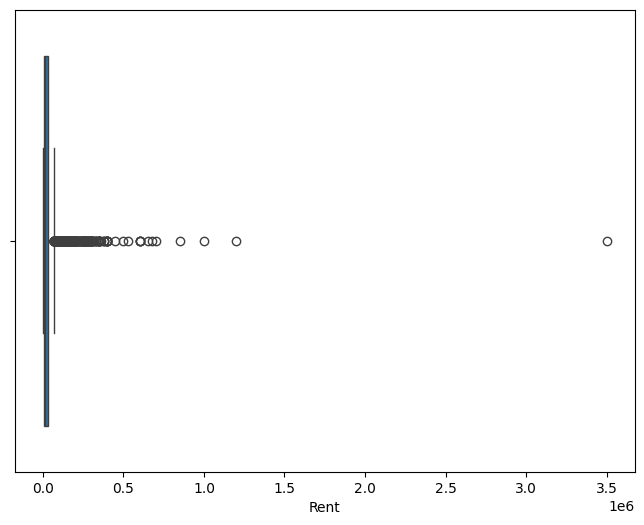

In [5]:
# 아웃라이어
# 데이터 집합에서 다른 관측치들과 동떨어진
# 극단적인 값을 가지는 데이터 포인트
#
# # Rent boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Rent'])
plt.show()



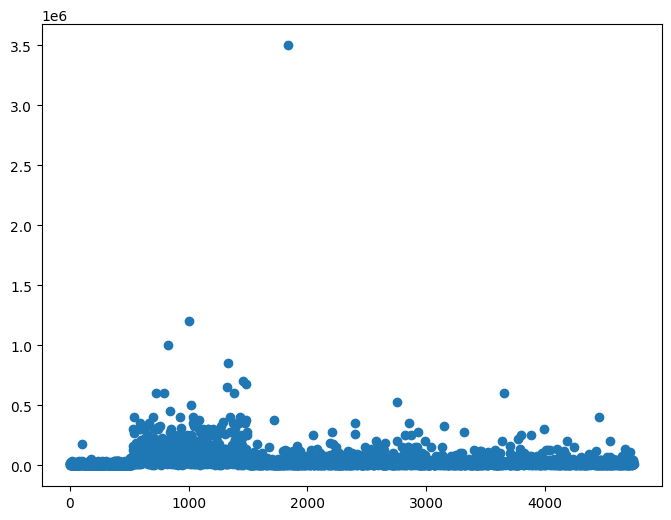

In [6]:
# # Rent scatter
plt.figure(figsize=(8,6))
plt.scatter(x=data.index, y=data['Rent'])
plt.show()

In [7]:
# BHK와 Rent 의 상관관계
corr_BR = data['BHK'].corr(data['Rent'])
p(f'BHK와 Rent의 상관관계: {corr_BR:.2f}')

BHK와 Rent의 상관관계: 0.37 



In [8]:
p(data['Rent'].mean())
p(max(data['Rent']))
max_rent = data['Rent'].max()
data = data[data['Rent'] != max_rent]


34993.45132743363 

3500000 



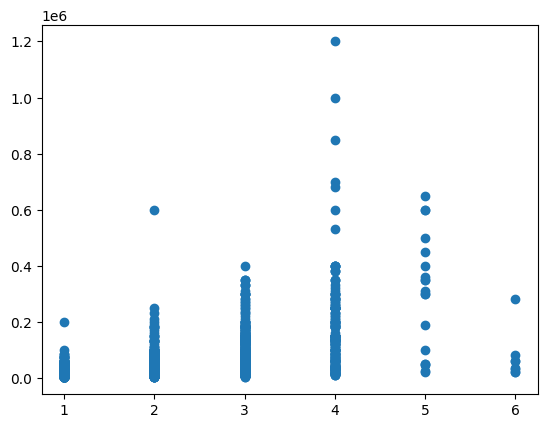

In [9]:
# # 산점도 시각화
plt.scatter(data['BHK'], data['Rent'])
plt.show()

In [10]:
# # Size 확인
p(data['Size'].value_counts())
p(data['Size'].sort_values())

Size
1000    240
600     225
800     220
1200    193
500     192
       ... 
2770      1
1252      1
904       1
721       1
855       1
Name: count, Length: 615, dtype: int64 

4653      10
116       20
2973      25
2913      25
2460      25
        ... 
1001    5000
2048    5700
3622    6000
4457    7000
4185    8000
Name: Size, Length: 4745, dtype: int64 



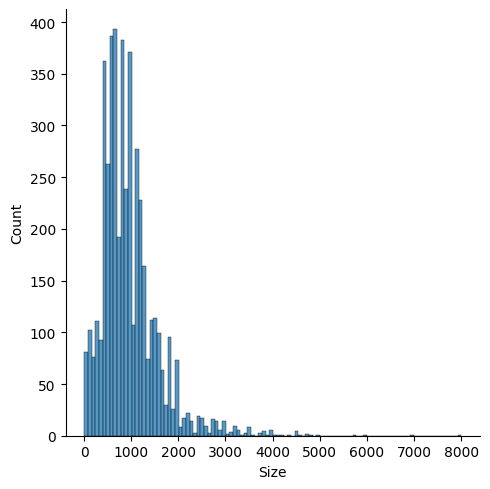

In [11]:
# # Size displot
sns.displot(data['Size'])
plt.show()

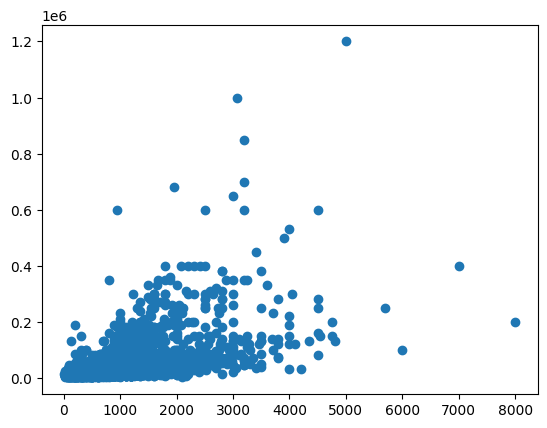

In [12]:
# Size 와 Rent 관계
plt.scatter(data['Size'], data['Rent'])
plt.show()

In [15]:
# 상관관계 확인
# 1. 임대료와 BHK 상관관계
p(f"BHK와 임대료 상관관계 : {data['BHK'].corr(data['Rent'])}")

# 2. 임대료와 Size 상관관계
p(f"Size와 임대료 상관관계 : {data['Size'].corr(data['Rent'])}")

BHK와 임대료 상관관계 : 0.46992466281164086 

Size와 임대료 상관관계 : 0.5113979896977979 



In [16]:
# 3. 임대료와 도시별 상관관계
# 도시는 문자이므로 수치형으로 변환해야 함
cities = data['City'].unique()
p(cities)

for city in cities:
    city_data = data[data['City']==city]
# 도시로 그룹핑한 후에 각 그룹들의 평균 임대료
city_mean = data.groupby('City')['Rent'].mean()
# p(city_mean)
# 도시는 문자이므로 수치형으로 변환해야 함
data['City_mean'] = data.groupby('City')['Rent'].transform('mean')
p(data['City_mean'])

# 상관관계 확인
p(f"임대료와 도시별 평균 임대료의 상관관계 : {data['Rent'].corr(data['City_mean'])}")

['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad'] 

0       11645.173664
1       11645.173664
2       11645.173664
3       11645.173664
4       11645.173664
            ...     
4741    20555.048387
4742    20555.048387
4743    20555.048387
4744    20555.048387
4745    20555.048387
Name: City_mean, Length: 4745, dtype: float64 

임대료와 도시별 평균 임대료의 상관관계 : 0.4398016028012616 



In [19]:
# City, Rent 그룹과 Rent 상관관계
rent_city = data.groupby('City')['Rent'].corr(data['Rent'])
p(rent_city)

City
Bangalore    1.0
Chennai      1.0
Delhi        1.0
Hyderabad    1.0
Kolkata      1.0
Mumbai       1.0
Name: Rent, dtype: float64 



In [18]:
# 도시목록 가져오기
cities = data['City'].unique()
p(cities)

# 도시별 임대료 상관관계
city_rent_corr = {}
for i in cities:
    city_data = data[data['City']==i]
    correlation = city_data['Rent'].corr(city_data['Rent'])
    city_rent_corr[i] = correlation
p(city_rent_corr)

['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad'] 

{'Kolkata': 0.9999999999999999, 'Mumbai': 1.0, 'Bangalore': 1.0, 'Delhi': 0.9999999999999998, 'Chennai': 1.0, 'Hyderabad': 0.9999999999999999} 



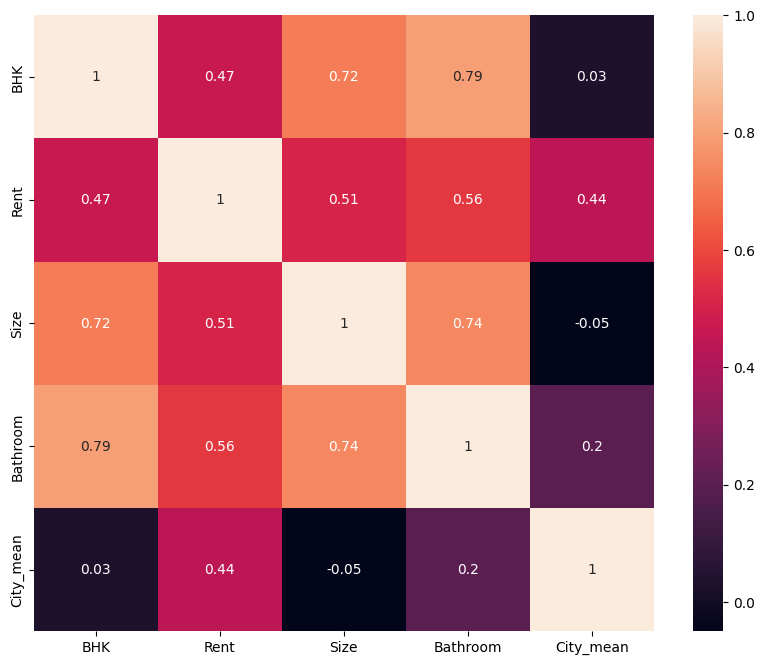

In [20]:
# 수치형 데이터들로 heatmap 그리기
# 수치형 변수만 선택
numeric_data = data.select_dtypes(include = ['int64','float64'])
numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot = True)
plt.show()

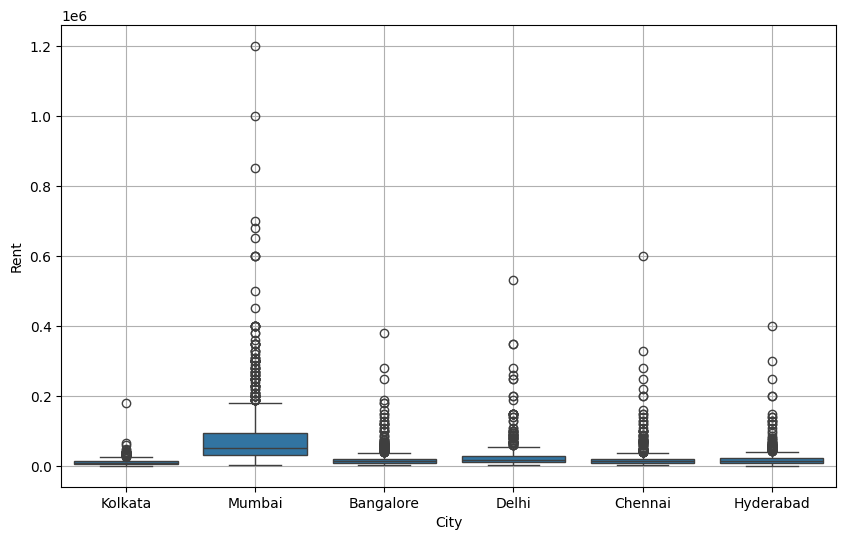

In [21]:
# 지역별 임대료 분포
plt.figure(figsize=(10,6))
sns.boxplot(x='City', y='Rent', data = data)
plt.grid(True)
plt.show()

In [22]:
# 평균 임대료 계산
avg_rent_city = data.groupby('City')['Rent'].mean().sort_values(ascending= False)
p(avg_rent_city)

City
Mumbai       85321.204733
Delhi        29461.983471
Chennai      21614.092031
Bangalore    21039.774011
Hyderabad    20555.048387
Kolkata      11645.173664
Name: Rent, dtype: float64 



In [23]:
# 날짜데이터 변환
data['Posted_On'] = pd.to_datetime(data['Posted_On'])
data['Year'] = data['Posted_On'].dt.year
data['Month'] = data['Posted_On'].dt.month
p(data['Year'].value_counts())
p(data['Month'].value_counts())

Year
2022    4745
Name: count, dtype: int64 

Month
6    1858
5    1681
7     978
4     228
Name: count, dtype: int64 



In [24]:
# 월별 평균 임대료
avg_month_rent = data.groupby(['Year','Month'])['Rent'].mean()
p(avg_month_rent)

Year  Month
2022  4        19070.504386
      5        27556.183819
      6        35523.837460
      7        46938.251534
Name: Rent, dtype: float64 



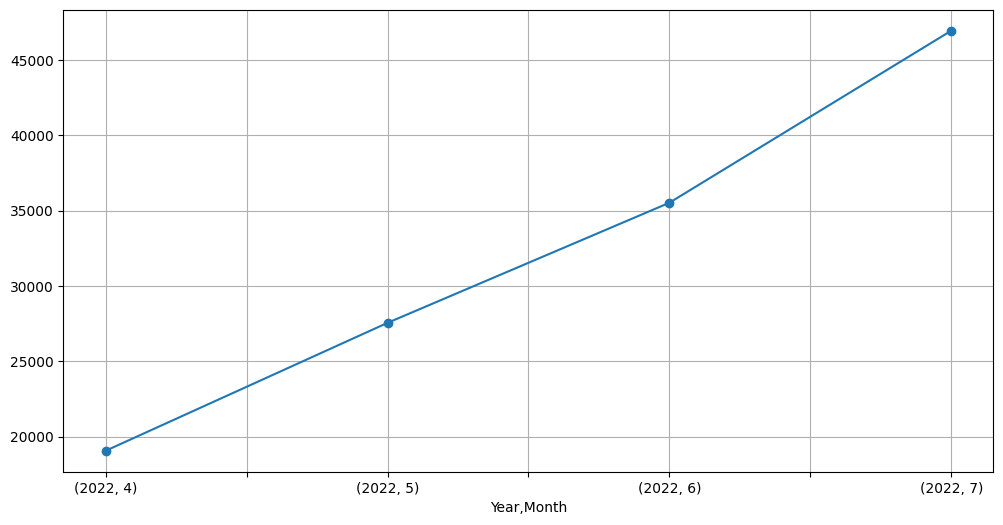

In [25]:
# 월별 평균임대료
plt.figure(figsize=(12,6))
avg_month_rent.plot(kind='line', marker='o')
plt.grid(True)
plt.show()


In [26]:
# 모델 선택
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# 필요한 컬럼 선택
features = ['BHK', 'Size', 'Floor', 'Bathroom']
data1 = data[features + ['Rent']]
p(data1)

# Floor 컬럼의 데이터 전처리 : 문자열에서 숫자만 추출하여 float 로 변환
data1['Floor'] = data1['Floor'].str.extract('(\d+)').astype(float)
p(data1['Floor'])

# 결측치 처리
data1 = data1.dropna() # 결측치가 있는 행 삭제
data1.info()


      BHK  Size            Floor  Bathroom   Rent
0       2  1100  Ground out of 2         2  10000
1       2   800       1 out of 3         1  20000
2       2  1000       1 out of 3         1  17000
3       2   800       1 out of 2         1  10000
4       2   850       1 out of 2         1   7500
...   ...   ...              ...       ...    ...
4741    2  1000       3 out of 5         2  15000
4742    3  2000       1 out of 4         3  29000
4743    3  1750       3 out of 5         3  35000
4744    3  1500     23 out of 34         2  45000
4745    2  1000       4 out of 5         2  15000

[4745 rows x 5 columns] 

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
4741     3.0
4742     1.0
4743     3.0
4744    23.0
4745     4.0
Name: Floor, Length: 4745, dtype: float64 

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4745
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BH

In [28]:
X = data1[features]
y = data1['Rent']
X_train, X_test, y_train, y_test \
    =train_test_split(X, y, test_size=0.2, random_state=42)

# 선형회귀 모델 생성
lr = LinearRegression()

# 훈련
lr.fit(X_train, y_train)

# 예측값
pred = lr.predict(X_test)

평균제곱 오차: 2255854587.5626945 



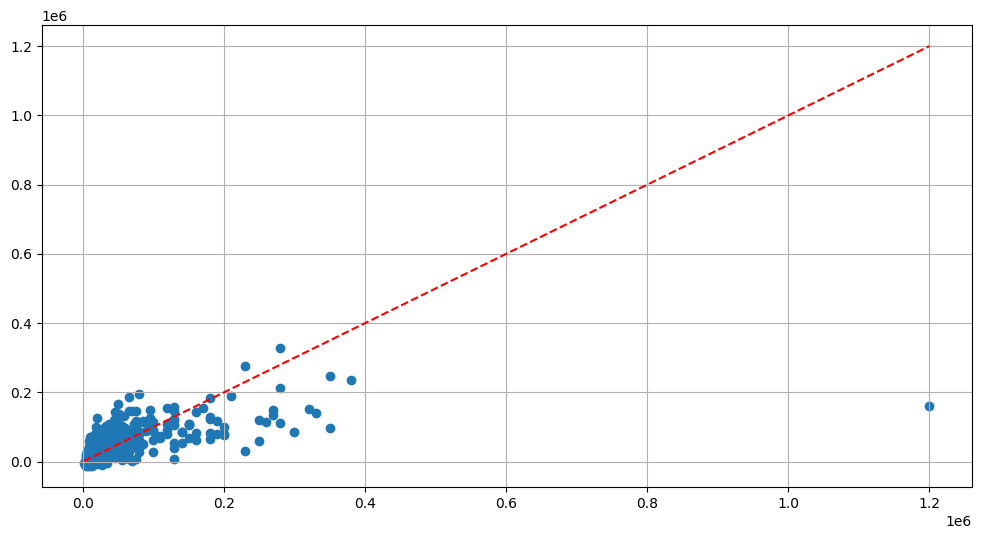

In [29]:
# 평균제곱 오차 계산(MSE)
mse = mean_squared_error(y_test, pred)
p(f"평균제곱 오차: {mse}")

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.scatter(y_test, pred)
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)],
    color = 'red',
    linestyle='--'
)
plt.grid(True)
plt.show()